In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev


In [ ]:
!pip install manim
!pip install IPython --upgrade

In [ ]:
import numpy as np
import itertools as it
#from manim import *
import matplotlib.pyplot as plt
from math import floor

In [ ]:
class flies:
    def __init__(self, pos_data, theta_data, i):
        self.i = i
        self.theta = theta_data
        self.pos = pos_data
        self.t = 0
        if 0<=i<N1:
          self.kind = 0
          self.color = RED_E
        elif N1<=i<N2:
          self.kind = 1
          self.color = GREEN_E
        elif N2<i:
          self.kind = 2
          self.color = BLACK


    def motion(self, Mobject, dt):

        self.t += dt
        s = int(self.t/d_t)
        Mobject.move_to(self.pos[s])

In [ ]:
'''Canvas Parameters'''

Lx = 5
Ly = 5

'''Initializing particals'''
N1 = 100
N2 = 100
N3 = 100
Interaction_range = 1
Nt = N1+N2+N3
pos_a = np.array(list(zip(np.random.uniform(0, Lx, N1), np.random.uniform(0, Ly, N1))))
pos_b = np.array(list(zip(np.random.uniform(0, Lx, N2), np.random.uniform(0, Ly, N2))))
pos_c = np.array(list(zip(np.random.uniform(0, Lx, N3), np.random.uniform(0, Ly, N3))))
iPos = np.concatenate((pos_a, pos_b, pos_c))
#iTheta = np.concatenate((0*np.pi/3*np.ones(N1), 3*np.pi/3*np.ones(N2), 0*np.pi/3*np.ones(N3)))
iTheta = np.random.uniform(0, 2*np.pi, Nt)
'''Cell list'''
N_cx = floor(Lx/Interaction_range)
N_cy = floor(Ly/Interaction_range)
r_cx = Lx/N_cx
r_cy = Ly/N_cy
#cell_list = [(x,y) for (y, x) in it.product(range(int(N_cy)), range(N_cx))]
#cell_list

'''Interaction Parameters'''
r = -0.5
nr = 0
'''J = np.array([[1, 0.5*(r+nr), 0.5*(r-nr)],[0.5*(r-nr), 1, 0.5*(r+nr)],[0.5*(r+nr), 0.5*(r-nr), 1]])
r1 = np.append(np.append(J[0][0]*np.ones(N1), J[0][1]*np.ones(N2)), J[0][2]*np.ones(N3))
r2 = np.append(np.append(J[1][0]*np.ones(N1), J[1][1]*np.ones(N2)), J[1][2]*np.ones(N3))
r3 = np.append(np.append(J[2][0]*np.ones(N1), J[2][1]*np.ones(N2)), J[2][2]*np.ones(N3))

J_int = np.concatenate((np.broadcast_to(r1, (N1, len(r1))), np.broadcast_to(r2, (N2, len(r2))), np.broadcast_to(r3, (N3, len(r3)))), axis = 0)'''
'''Motion'''
d_t = 0.01
v = 0.5

'''Temperature'''
T = 0

In [ ]:
def Cell_list(pos):
  k = 0
  cell_list = {i: [] for i in range(N_cx*N_cy)}
  for p in pos:
    i = int(p[0]*N_cx/Lx)
    j = int(p[1]*N_cy/Ly)
    cell_list[N_cx*j+i].append(k)
    k+=1
  return cell_list

def Cell_neighbours(i):
  neighbours =  []
  y = (i)//N_cx
  x = (i)%N_cx
  neigh = [((x+1)%N_cx, y), (x, (y+1)%N_cy), ((x+1)%N_cx, (y+1)%N_cy), ((x+1)%N_cx, (y-1)%N_cy)]
  #neigh = [((x+1)%N_cx, y), (x, (y+1)%N_cy), ((x+1)%N_cx, (y+1)%N_cy), (x, (y-1)%N_cy), ((x+1)%N_cx, (y-1)%N_cy), ((x-1)%N_cx, (y-1)%N_cy), ((x-1)%N_cx, y), ((x-1)%N_cx, (y+1)%N_cy)]
  for (x, y) in neigh:
    neighbours.append(N_cx*y+x)
  return neighbours

def Cell_pairs():
  cell_pairs = []
  for i in range(N_cx*N_cy):
    cell_pairs.append(list(it.product([i], Cell_neighbours(i))))
  return np.reshape(cell_pairs, (4*N_cx*N_cy,2))

cell_pairs = Cell_pairs()

def adjacency(pos):
    P = np.zeros((Nt, Nt))
    cell_list = Cell_list(pos)

    for [C_i, C_n] in cell_pairs:
      for p in cell_list[C_i]:
          for q in cell_list[C_n]:
            P[p][q] = 1

    return P+P.T

def sum_theta_ij(theta):
  Theta_ij = np.tile(theta, (Nt, 1))
  return np.sin(Theta_ij-Theta_ij.T)


class interaction_matrix:
  def __init__(self, r, nr):
    J = np.array([[1, 0.5*(r+nr), 0.5*(r-nr)],[0.5*(r-nr), 1, 0.5*(r+nr)],[0.5*(r+nr), 0.5*(r-nr), 1]])
    r1 = np.append(np.append(J[0][0]*np.ones(N1), J[0][1]*np.ones(N2)), J[0][2]*np.ones(N3))
    r2 = np.append(np.append(J[1][0]*np.ones(N1), J[1][1]*np.ones(N2)), J[1][2]*np.ones(N3))
    r3 = np.append(np.append(J[2][0]*np.ones(N1), J[2][1]*np.ones(N2)), J[2][2]*np.ones(N3))
    J_int = np.concatenate((np.broadcast_to(r1, (N1, len(r1))), np.broadcast_to(r2, (N2, len(r2))), np.broadcast_to(r3, (N3, len(r3)))), axis = 0)
    self.matrix = J_int

J_int = interaction_matrix(r, nr)

def Update_angle(pos, theta, T):
  #Detecting walls
  for i in range(Nt):
    if any(pos[i] < np.array([0, 0])) or any(np.array([Lx, Ly]) < pos[i]):
      c = np.array(pos[i] < np.array([0, 0]), dtype=int) - np.array(np.array([Lx, Ly]) < pos[i], dtype=float)
      pos[i] = np.array([(pos[i][0]*c[0]+Lx)*c[0], (pos[i][1]*c[1]+Ly)*c[1]])+np.array([pos[i][0]*(1-c[0]**2), pos[i][1]*(1-c[1]**2)])
  #Neighbourhood
  A = adjacency(pos)
  theta = theta + d_t*np.sum(np.multiply(A, np.multiply(J_int.matrix,sum_theta_ij(theta))), axis = 1) + np.random.normal(0, np.sqrt(2*T), Nt) #Noise
  vel = v*np.array([np.cos(theta), np.sin(theta)])
  pos = pos + vel.T*d_t

  return theta, pos

In [ ]:
'''Simulation'''

def Simulation(r, nr, T):
    pos_a = np.array(list(zip(np.random.uniform(0, Lx, N1), np.random.uniform(0, Ly, N1))))
    pos_b = np.array(list(zip(np.random.uniform(0, Lx, N2), np.random.uniform(0, Ly, N2))))
    pos_c = np.array(list(zip(np.random.uniform(0, Lx, N3), np.random.uniform(0, Ly, N3))))
    iPos = np.concatenate((pos_a, pos_b, pos_c))
    #iTheta = np.concatenate((0*np.pi/3*np.ones(N1), 3*np.pi/3*np.ones(N2), 0*np.pi/3*np.ones(N3)))
    iTheta = np.random.uniform(0, 2*np.pi, Nt)

    J = np.array([[1, 0.5*(r+nr), 0.5*(r-nr)],[0.5*(r-nr), 1, 0.5*(r+nr)],[0.5*(r+nr), 0.5*(r-nr), 1]])
    r1 = np.append(np.append(J[0][0]*np.ones(N1), J[0][1]*np.ones(N2)), J[0][2]*np.ones(N3))
    r2 = np.append(np.append(J[1][0]*np.ones(N1), J[1][1]*np.ones(N2)), J[1][2]*np.ones(N3))
    r3 = np.append(np.append(J[2][0]*np.ones(N1), J[2][1]*np.ones(N2)), J[2][2]*np.ones(N3))
    J_ff = np.concatenate((np.broadcast_to(r1, (N1, len(r1))), np.broadcast_to(r2, (N2, len(r2))), np.broadcast_to(r3, (N3, len(r3)))), axis = 0)

    J_int.matrix = J_ff

    t = 0
    run_time = 20
    pos_data = [iPos]
    theta_data = [iTheta]
    i = 0
    after_some_time = run_time-50

    while t<after_some_time:

      theta_data[0], pos_data[0] = Update_angle(pos_data[i], theta_data[i], T)
      t+=d_t

    while t<run_time:
      theta, pos = Update_angle(pos_data[i], theta_data[i], T)
      pos_data.append(pos)
      theta_data.append(theta)
      i+=1
      t+=d_t
    pos_data= np.append(pos_data, np.zeros((len(pos_data), Nt, 1)), axis = 2)

    return pos_data, theta_data

In [ ]:
def CheckSteady(r, nr, T):
    state = -1
    pos_data, theta_data = Simulation(r, nr, T)

    '''a = np.mean(np.absolute(np.array(theta_data)[:,0:N1]%(2*np.pi)), axis = 1)
    b = np.mean(np.absolute(np.array(theta_data)[:,N1:N1+N2]%(2*np.pi)), axis = 1)
    adot = np.mean(np.absolute(((np.array(theta_data)[1:,0:N1]-np.array(theta_data)[:-1,0:N1])/d_t)%(2*np.pi)), axis = 1)
    bdot = np.mean(np.absolute(((np.array(theta_data)[1:,N1:N1+N2]-np.array(theta_data)[:-1,N1:N1+N2])/d_t)%(2*np.pi)), axis = 1)'''

    order1 = np.sqrt((np.sum(np.sin(np.array(theta_data)[-1000:,:]), axis = 1))**2+(np.sum(np.cos(np.array(theta_data)[-1000:,:]), axis = 1))**2)
    #order2 = np.mean(adot[-50:]-bdot[-50:])
    return order1

In [ ]:
np.mean(CheckSteady(-0.5, 0, 1))

15.508698225887024

In [ ]:
def PhaseDiagram(res):
  Temp = np.linspace(0, 1, 10)
  '''R = np.linspace(-0.5, 0.5, res)
  NR = np.linspace(-0.5, 0.5, res)'''
  r = 0.5
  nr = 0
  data = []
  i = 0
  for T in Temp:
      print(i)
      i+=1
      data.append(CheckSteady(r, nr, T))
      #print(CheckSteady(r, nr, T))
      #print((r,nr))
  return data

In [ ]:
phase = PhaseDiagram(1)

0
1
2
3
4
5
6
7
8
9


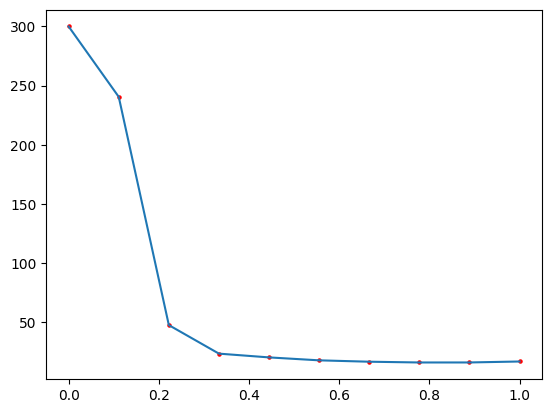

In [ ]:
Temp = np.linspace(0, 1, 10)
plt.scatter(Temp, np.mean(phase, axis =1), s = 5, c = 'red')
plt.plot(Temp, np.mean(phase, axis =1))

In [ ]:
np.savetxt('transtion_alignment_r-0.5_nr0.csv', phase, delimiter=',')

In [ ]:
CheckSteady(r, nr, Temp[8])

0.8828524052607318

In [ ]:
res = 1
R = np.linspace(-0.5, 0.5, res)
NR = np.linspace(-0.5, 0.5, res)
print(list(it.product(R, NR)))

[(-0.5, -0.5)]


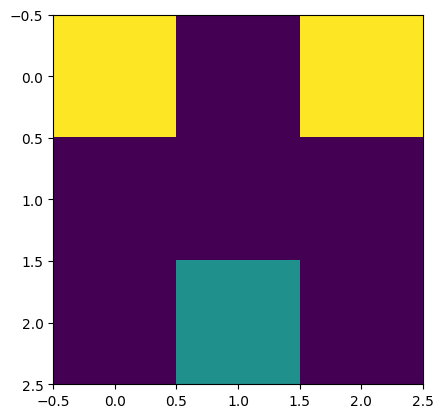

In [ ]:
plt.imshow(phase)

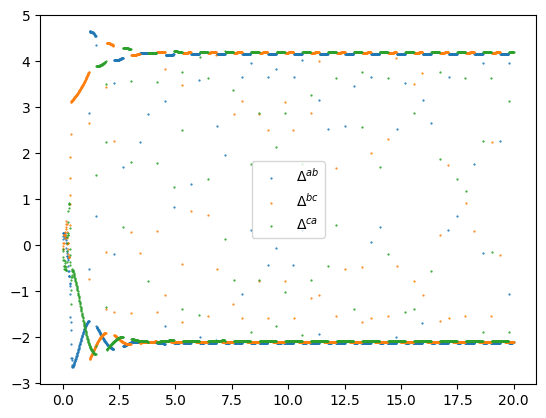

In [ ]:
t = np.linspace(0, run_time, int((run_time)/d_t)+1)
a = np.sum(np.absolute(np.array(theta_data)[:,0:N1]%(2*np.pi)), axis = 1)/N1
b = np.sum(np.absolute(np.array(theta_data)[:,N1:N1+N2]%(2*np.pi)), axis = 1)/N2
c = np.sum(np.absolute(np.array(theta_data)[:,N1+N2:]%(2*np.pi)), axis = 1)/N3
d1 = a-b
d2 = b-c
d3 = c-a
'''plt.plot(t[-100:], (a%(2*np.pi))[-100:])
plt.plot(t[-100:], (b%(2*np.pi))[-100:])
plt.plot(t[-100:], (c%(2*np.pi))[-100:])'''
plt.scatter(t, d1, label = "$\Delta^{ab}$", s = 0.3)
plt.scatter(t, d2, label = "$\Delta^{bc}$", s = 0.3)
plt.scatter(t, d3, label = "$\Delta^{ca}$", s = 0.3)
#plt.scatter(np.linspace(0, run_time, 20),np.pi/3*np.ones(20), c = 'black', marker = "_")
plt.legend()
#plt.plot(t, 4*np.pi/3*np.ones(len(t)))

True

In [ ]:
R = np.linspace(-0.5, 0.5, 10)

In [ ]:
%%manim -ql -v WARNING Synchronize
config.frame_width = Lx
config.frame_height = Ly
class Synchronize(MovingCameraScene):
    def construct(self):
        pos = np.append(iPos, np.zeros((Nt, 1)), axis = 1)
        self.camera.background_color = GREY_A
        self.camera.frame.shift(Ly/2*UP+Lx/2*RIGHT)
        self.camera.frame.set(width=2*Ly)
        ax = Axes().add_coordinates()
        rect  = Rectangle(height = Ly, width = Lx).shift(Ly/2*UP+Lx/2*RIGHT)
        rect.stroke_width = 8
        self.add(rect)
        fly_rep = []
        for i in range(Nt):
          if 0<=i<N1:
            c = RED_E
          elif N1<=i<N2+N1:
            c = GREEN_E
          elif N2+N1<i:
            c = BLACK
          fly_rep.append(Dot(pos[i], radius=0.02, color = c))

        for i in range(Nt):
            fly_rep[i].add_updater(flies(np.array(pos_data)[:,i], np.array(theta_data)[:,i], i).motion)
            self.add(fly_rep[i])
        self.wait(15)